# Detecting Symptoms of Parkinson's Disease by Voice
#### CMSC 422, Spring 2023
#### Ozu Woodroffe

## Introduction

Parkinson's Disease (PD) is a degenerative brain disease, characterized by the loss of motor functions, cognitive impairment, sleep and pain disorders. The disease gradually impairs or destroys neurons in the basal ganglia, causing loss in motor control and cognition.

According to the World Health Organization, "disability and death due to PD are increasing faster than for any other neurological disorder." 

There are currently no blood or labratory tests to diagnose PD. Genetic testing is far from conclusive, as the associated mutations are only indicators, and many cases of PD are non-genetic. The current method of diagnosis is to perform a neurological exam, and see if the symptoms respond to early treatment. 

PD has several risk factors,
- Genetic Factors
- Environmental  Factors
- Age: Parkinson's tends to manifest in older people, usually in those aged 60+

## Motivation:

As an incurable degenerative disease, it is vital that PD is addressed early. However, diagnosis is far from straightforward, and none of the risk factors are an accurate indicator to get diagnosed in the first place. Although the disease has genetic factors, it is rarely inherited from families. The enviromental factors are fairly widespread toxins such as pesticides. Many of the symptoms: muscle tremors and stiffness, loss of coordination, cognitive decline and sleep trouble are easily misattributed to aging in their early stages. A diagnosal tool that one could use at home, without supervision and much commitment could be an effective motivator to get diagnosed. Since PD effects motor control, it can be identified by changes in one's voice and in the age of smartphones everyone has a microphone.

## Data:
All of the following datasets were provided by University of California, Irvine. 
### Dataset 1: 

 The first dataset was of a series of recordings collected at the [Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University](https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#).
 The recordings were recorded using a 44.1 KHz microphone, gathered from 188 PD patients (107 men, 81 women) ranging from 33 to 87 years old. The high quality of the microphone shouldn't create any imbalance in data quality from different sources, as the human voice cannot create any sounds remotely near that cap.

 The first dataset has a huge dimensionality, but has groupings of the columns based on where they were found. They are in the sections:
- Baseline Features
- Intesnity Parameters
- Formant Frequencies
- Bandwidth Parameters
- Vocal Fold 
- MFCC
- Wavelet Features
- TQWT Features
 
 
 It seems that MFCC, Wavelet Features, TQWT Features are each transformations of the same sound data. For project I will be using only some of the Baseline features, as these values can be found in the second and third databases.


In [11]:
import pandas as pd

import numpy as np

data_Istanbul = pd.read_csv("data/PD_Istanbul.csv", delimiter=',')
data_Istanbul.columns = data_Istanbul.iloc[0]
data_Istanbul = data_Istanbul[1:].reset_index(drop=True, inplace=False)
null_vals=data_Istanbul.isnull().sum()
data_Istanbul['class']=data_Istanbul['class'].astype('int')
print(null_vals.loc[null_vals !=0])
data_Istanbul

Series([], dtype: int64)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
4,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


### Dataset 2:

This dataset is composed of 5875 recordings of 42 PD patients over a 6 month trial. Each patient has ~200 individual recordings.
This set was found by a telecommunications study at Oxford University.

In [12]:
data_Oxford = pd.read_csv("data/PD_Oxford.csv")
null_vals=data_Oxford.isnull().sum()
print(null_vals.loc[null_vals !=0])
data_Oxford

Series([], dtype: int64)


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


### Dataset 3:
The second dataset is from another [Oxford study](https://data.world/uci/parkinsons):

In [13]:
data_Oxford2= pd.read_csv("data/PD_Oxford2.csv")

null_vals=data_Oxford2.isnull().sum()
print(null_vals.loc[null_vals !=0])
data_Oxford2

Series([], dtype: int64)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Dataset 4: 
As the first two datasets are heavily imbalanced, with about 75% being PD patients. To help balance this, I used an audio feature extraction library to parse wav files into usable data.

This dataset is of 151 healthy subjects producing a sustained /a/ sound in a neutral tone, ranging from 33 to 87 years old. 

For the audio analysis, I used the [surfboard](https://github.com/novoic/surfboard) library. This library is a very simple and easy to use when performing audio feature extraction, however it runs with older libraries and python3.7, so it may take some tuning to setup. Also, [This RPDE calculator](https://pypi.org/project/pyrpde/) uses the latest numba version, making it incompatible with this library, so unfortunately I had to remove RPDE from this project. There is an alternative audio feature extraction library that is compatible with the RPDE calculator, [Parselmouth](https://parselmouth.readthedocs.io/en/stable/), that uses PRAAT software if you're interested in audio analysis.

The dataset is taken from [Saarbruecken Voice Database](https://stimmdb.coli.uni-saarland.de/index.php4#target) run by the University of Saarlandes' Institute of Phoenetics. 

In [14]:
#import parselmouth
#from parselmouth.praat import call
import librosa
from pathlib import Path
from surfboard.sound import Waveform
from surfboard.feature_extraction import extract_features
from tqdm import tqdm
import os
 
# assign directory
directory = 'data/Saarbruecken_healthy_voices/export/'
 
data_S = pd.DataFrame(columns=['filename'])
print(data_S)
# iterate over files in the directory, get filenames
files = Path(directory).glob('*-a_n.wav')
waveforms = []
for fname in tqdm(files):
    waveforms.append(Waveform(path=str(fname)))

feature_df = extract_features(
    waveforms=waveforms, components_list=['dfa', 'jitters', 'shimmers', 'hnr', 'ppe'], statistics_list=['min','max','mean']
    )
feature_df['ppe'] =( feature_df['ppe'] - feature_df['ppe'].mean() ) / feature_df['ppe'].std()


Empty DataFrame
Columns: [filename]
Index: []


151it [00:14, 10.28it/s]
Extracting features...:  11%|█▏        | 17/151 [00:13<01:54,  1.17it/s]c:\Users\Jeanne\AppData\Local\Programs\Python\Python37-32\lib\site-packages\surfboard\hnr.py:81: RuntimeWarning: divide by zero encountered in true_divide
  r_x = ffts_outputs[0] / ffts_outputs[1]
c:\Users\Jeanne\AppData\Local\Programs\Python\Python37-32\lib\site-packages\surfboard\hnr.py:81: RuntimeWarning: invalid value encountered in true_divide
  r_x = ffts_outputs[0] / ffts_outputs[1]
Extracting features...:  30%|███       | 46/151 [00:29<00:57,  1.84it/s]c:\Users\Jeanne\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\Jeanne\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Jeanne\AppData\Local\Programs\Python\Python37-32\lib\site-pack

In the text-based datasets PPE is already scaled to between (0,1), so the same will need to be done for the calculated PPEs:

In [15]:
from sklearn import preprocessing
scale= preprocessing.MinMaxScaler()
arr=feature_df['ppe'].to_numpy().reshape(-1,1)
arr=scale.fit_transform(arr)
flat_list = [item for sublist in arr for item in sublist]
feature_df['ppe_norm'] = pd.Series(flat_list)
feature_df.dropna(inplace=True)
feature_df

,dfa,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,hnr,ppe,ppe_norm
0,0.843983,0.001280,0.000011,0.000313,0.000557,0.000940,0.013063,0.112900,0.006510,0.011420,0.022654,21.081602,-2.278872,0.284742
1,0.784355,0.001357,0.000010,0.000355,0.000727,0.001065,0.012011,0.105730,0.006437,0.010444,0.019387,23.574854,-0.273636,0.643945
2,1.057243,0.001159,0.000012,0.000294,0.000601,0.000882,0.018967,0.150003,0.011492,0.019993,0.036478,21.247350,-0.787031,0.551979
3,0.961697,0.000803,0.000009,0.000210,0.000403,0.000630,0.009513,0.082785,0.005361,0.008346,0.013542,23.814780,-3.868434,0.000000
4,0.930235,0.001942,0.000015,0.000424,0.000989,0.001273,0.012273,0.107587,0.005277,0.008455,0.016164,21.204734,0.080321,0.707350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.768347,0.004113,0.000023,0.000971,0.001781,0.002912,0.015039,0.133601,0.006273,0.009708,0.014371,18.938957,1.435533,0.950112
147,0.869231,0.001685,0.000010,0.000373,0.000783,0.001120,0.017351,0.156034,0.008889,0.014906,0.027018,22.835726,-0.029589,0.687662
148,1.056160,0.002258,0.000021,0.000458,0.000904,0.001374,0.025528,0.219897,0.016053,0.024365,0.039116,15.162984,0.342171,0.754256
149,1.077105,0.001432,0.000014,0.000291,0.000612,0.000872,0.016276,0.140157,0.007624,0.012371,0.024536,20.580104,-0.067441,0.680881


## Joining the Datasets:

In [35]:
data_Istanbul_reduced = data_Istanbul.drop(columns = data_Istanbul.columns[23:], inplace=False).astype('float')
data_Istanbul_reduced.drop(columns=['id','gender','meanAutoCorrHarmonicity', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses','stdDevPeriodPulses','meanNoiseToHarmHarmonicity','RPDE', 'ddaShimmer'], inplace=True)
data_Istanbul_reduced.rename(columns = {'locPctJitter':'Jitter(%)', 'locAbsJitter':'Jitter(Abs)', 'rapJitter':'Jitter:RAP', 'ppq5Jitter':'Jitter:PPQ5', 'ddpJitter':'Jitter:DDP', 'locShimmer':'Shimmer', 'locDbShimmer':'Shimmer(dB)', 'apq3Shimmer':'Shimmer:APQ3', 'apq5Shimmer':'Shimmer:APQ5','apq11Shimmer':'Shimmer:APQ11','meanHarmToNoiseHarmonicity':'HNR'}, inplace = True)
data_Istanbul_reduced['status']=data_Istanbul['class'].astype('int')
data_Istanbul_reduced.sort_index(inplace =True, axis=1)

data_Oxford1_reduced = data_Oxford.drop(columns = ['test_time','sex','subject#', 'age', 'motor_UPDRS', 'total_UPDRS','RPDE'], inplace=False)
data_Oxford1_reduced['status'] = 1
data_Oxford1_reduced.rename(columns = {'Shimmer(Db)':'Shimmer(dB)'}, inplace = True)
data_Oxford1_reduced.sort_index(inplace = True, axis=1)

data_Oxford2_reduced = data_Oxford2.drop(columns = ['name','MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)', 'spread1','spread2', 'D2','RPDE','Shimmer:DDA','NHR'])
data_Oxford2_reduced.rename(columns={'MDVP:Jitter(%)':'Jitter(%)', 'MDVP:Jitter(Abs)':'Jitter(Abs)', 'MDVP:RAP':'Jitter:RAP', 'MDVP:PPQ':'Jitter:PPQ5', 'MDVP:Shimmer':'Shimmer', 'MDVP:Shimmer(dB)':'Shimmer(dB)', 'MDVP:APQ':'Shimmer:APQ11'}, inplace = True)
data_Oxford2_reduced.sort_index(inplace = True, axis=1)

feature_df_reduced = feature_df.drop(columns = ['ppe'], inplace=False )
feature_df_reduced['status'] = 0
feature_df_reduced.rename(columns={'dfa':'DFA', 'ppe_norm':'PPE','localJitter':'Jitter(%)', 'localabsoluteJitter':'Jitter(Abs)', 'rapJitter':'Jitter:RAP', 'ppq5Jitter':'Jitter:PPQ5', 'ddpJitter':'Jitter:DDP', 'localShimmer':'Shimmer', 'localdbShimmer':'Shimmer(dB)', 'apq3Shimmer':'Shimmer:APQ3', 'apq5Shimmer':'Shimmer:APQ5','apq11Shimmer':'Shimmer:APQ11','hnr':'HNR'}, inplace = True)

df_final = pd.concat([data_Istanbul_reduced, data_Oxford2_reduced,feature_df_reduced])



df_final.reset_index(inplace=True)
df_final

,index,DFA,HNR,Jitter(%),Jitter(Abs),Jitter:DDP,Jitter:PPQ5,Jitter:RAP,PPE,Shimmer,Shimmer(dB),Shimmer:APQ11,Shimmer:APQ3,Shimmer:APQ5,status
0,0,0.718260,18.995000,0.002180,0.000018,0.002000,0.001290,0.000670,0.852470,0.058830,0.517000,0.048280,0.030110,0.034960,1
1,1,0.694810,21.497000,0.001950,0.000016,0.001570,0.001120,0.000520,0.766860,0.055160,0.502000,0.061950,0.023200,0.036750,1
2,2,0.676040,17.651000,0.001760,0.000015,0.001710,0.001110,0.000570,0.850830,0.099020,0.897000,0.077720,0.050940,0.064970,1
3,3,0.796720,19.865000,0.004190,0.000046,0.004460,0.002680,0.001490,0.411210,0.054510,0.527000,0.044620,0.023950,0.028570,1
4,4,0.797820,19.557000,0.005350,0.000044,0.004990,0.002270,0.001660,0.327900,0.056100,0.497000,0.052780,0.029090,0.033270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,146,0.768347,18.938957,0.004113,0.000023,0.002912,0.001781,0.000971,0.950112,0.015039,0.133601,0.014371,0.006273,0.009708,0
1095,147,0.869231,22.835726,0.001685,0.000010,0.001120,0.000783,0.000373,0.687662,0.017351,0.156034,0.027018,0.008889,0.014906,0
1096,148,1.056160,15.162984,0.002258,0.000021,0.001374,0.000904,0.000458,0.754256,0.025528,0.219897,0.039116,0.016053,0.024365,0
1097,149,1.077105,20.580104,0.001432,0.000014,0.000872,0.000612,0.000291,0.680881,0.016276,0.140157,0.024536,0.007624,0.012371,0


The Proportion of PD Positive:Negative subjects has been improved slightly. Ideally there would be a higher number of PD negative subjects, as this is more consistent with the general population. However, in absence of availible normative voice data of a neutral /a/ tone, I will use undersampling to achieve a training set with an equal number of PD positive and negative subjects.

In [17]:
from sklearn import ensemble, linear_model, metrics, preprocessing, model_selection, svm, dummy,tree, neighbors
import seaborn as sns

<AxesSubplot:>

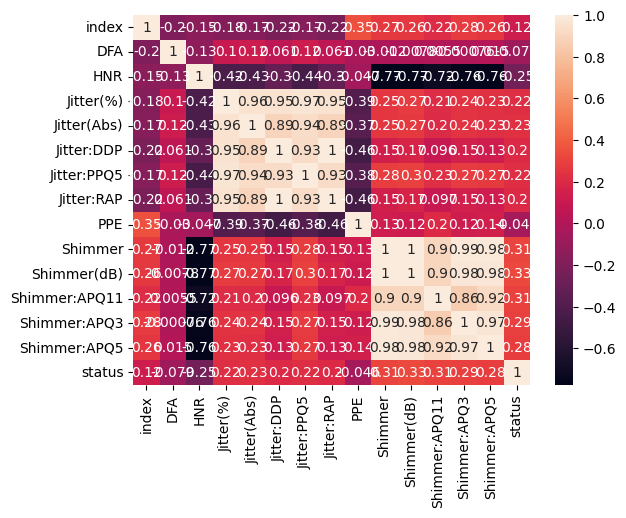

In [18]:
sns.heatmap(df_final[df_final.columns].corr(),annot=True)

The heatmap above indicates that the shimmer and jitter features are each highly correltated with one another. This is not very suprising, however a few variables seem to be almost or completely correlated with one another. I will remove any variable that shares a correlation of >=.97 with another variable.

Proportion of (Istanbul) subjects with PD:  0.746031746031746
Proportion of (Oxford2) subjects with PD:  0.7538461538461538
Proportion of (Final) subjects with PD:  0.6469517743403094


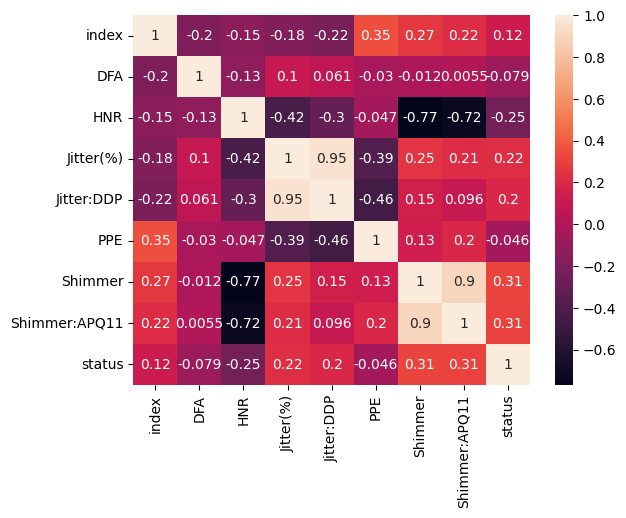

In [19]:
df_final.drop(columns=['Jitter(Abs)','Shimmer:APQ5','Shimmer:APQ3','Shimmer(dB)','Jitter:RAP','Jitter:PPQ5'], inplace=True)
#df_final.drop(columns=['Shimmer(dB)','Jitter:RAP'], inplace=True)
sns.heatmap(df_final[df_final.columns].corr(),annot=True)
print('Proportion of (Istanbul) subjects with PD: ', data_Istanbul_reduced['status'].astype('int').mean())
print('Proportion of (Oxford2) subjects with PD: ', data_Oxford2_reduced['status'].astype('int').mean())


print('Proportion of (Final) subjects with PD: ', df_final['status'].astype('int').mean())

Although Jitter:DDP and Shimmer:APQ11 both are highly correlated with another feature, they differ enough that the data may remain useful

## Oversampling
Thankfully, sklearn has a [resampling](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) function to make this easy. For this resampling, I'm raising the number of negative samples by 1.5 times. Making the positive and negative sample sizes equal would result in too many duplicate negative entries, making the models highly inaccurate. This will probably make the training accuracy a bit higher than the testing accuracy, as there are now duplicate entries in that training data.

In [20]:

import matplotlib.pyplot as plt

#Unused Random forest classifier
def runRFC(X_train, X_test,y_train, y_test, col):
      
    rfc=ensemble.RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    print ('\n RANDOM FOREST:\n ', metrics.classification_report(y_test,rfc_pred))
    print_cm(rfc, y_test, rfc_pred)
    print ('Recall of random forest model (using test data):',metrics.recall_score(y_test, rfc.predict(X_test), average=None)[0])
    sns.barplot(x=rfc.feature_importances_, y=col)




def print_cm(model, y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    fig = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
    fig.plot()
    plt.show()


In [21]:
from sklearn import utils

X_train, X_test, y_train, y_test = model_selection.train_test_split(df_final.drop(columns=['status'], inplace=False), df_final['status'], test_size = 0.2)
print ('training data:\n',y_train.value_counts())
train_tog = pd.concat([X_train, y_train.astype('int')], axis=1)
#train_tog.reset_index()
# Seperate training data:
PDpos = df_final.loc[df_final['status']==1]
PDneg = df_final.loc[df_final['status']==0]

#resample:
samp = utils.resample(PDneg, replace=True, n_samples= int(1.5*len(PDneg)), random_state=32)

#reform training data:
new_test = pd.concat([PDpos,samp])
y_train_scaled = new_test['status'].copy()
X_train_scaled = new_test.drop(columns =['status'],inplace=False)

print ('training data (Oversampled):\n',y_train_scaled.value_counts())
print ('testing data:\n',y_test.value_counts())


training data:
 1    564
0    315
Name: status, dtype: int64
training data (Oversampled):
 1    711
0    582
Name: status, dtype: int64
testing data:
 1    147
0     73
Name: status, dtype: int64


## Dummy Classifier
To compare the following classifiers, I will run both the oversampled and normal data with a Dummy classifier:

In [26]:
def runDummy(X_train, X_test,y_train, y_test): 
    dum = dummy.DummyClassifier()
    dum.fit(X_train, y_train)
    dum_pred = dum.predict(X_test)
    print ('\nDUMMY:\n ', metrics.classification_report(y_test,dum_pred))

runDummy(X_train, X_test,y_train, y_test)


DUMMY:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.67      1.00      0.80       147

    accuracy                           0.67       220
   macro avg       0.33      0.50      0.40       220
weighted avg       0.45      0.67      0.54       220



c:\Users\Jeanne\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jeanne\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jeanne\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Predictably, the dummy classifier has a higher-than-average accuracy of .67, due to the testing data being 2/3 PD positive. As a result, most of the improvement in this classifier will be in how many PD negative subjects are propperly classified while still having a high f1 score for PD positive predictions.

## SVM
For the first classifier, I decided to use an SVM. SVM's are very good at binary classification, so I had hoped that this would achieve a high accuracy.


SVM:
                precision    recall  f1-score   support

           0       0.78      0.55      0.65        73
           1       0.80      0.93      0.86       147

    accuracy                           0.80       220
   macro avg       0.79      0.74      0.75       220
weighted avg       0.80      0.80      0.79       220

training accuracy:  0.8213879408418657


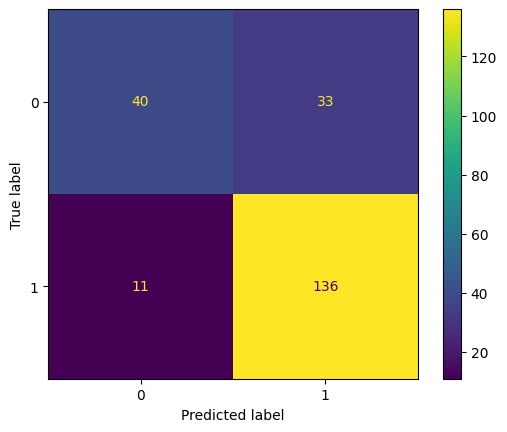


SVM:
                precision    recall  f1-score   support

           0       0.75      0.71      0.73        73
           1       0.86      0.88      0.87       147

    accuracy                           0.83       220
   macro avg       0.81      0.80      0.80       220
weighted avg       0.83      0.83      0.83       220

training accuracy:  0.8159319412219644


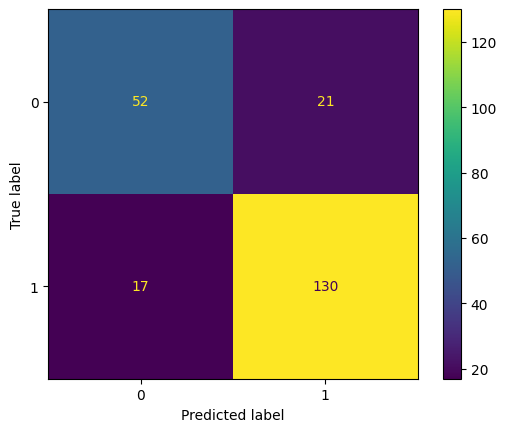

In [22]:
def runSVM(X_train, X_test,y_train, y_test):
    scale= preprocessing.StandardScaler()
    X_train =scale.fit_transform(X_train)
    X_test =scale.fit_transform(X_test)

    svm_mod = svm.SVC()
    svm_mod.fit(X_train, y_train)
    svm_mod_pred = svm_mod.predict(X_test)
    svm_train_pred = svm_mod.predict(X_train)
    print ('\nSVM:\n ', metrics.classification_report(y_test,svm_mod_pred))
    print ('training accuracy: ', metrics.accuracy_score(y_train,svm_train_pred))
    print_cm(svm_mod, y_test, svm_mod_pred)
    
runSVM(X_train, X_test,y_train, y_test)
runSVM(X_train_scaled, X_test,y_train_scaled, y_test)

It seems that using upscaling with an SVM causes overall accuracy to improve slightly, along with the f1 score for PD positive predictions. Training score remained relatively similar. The recall for predicting a PD positive patient seems to have fallen slightly, however the increase in f1 score for predicting a PD negative patient greatly overweighs that small decrease.

Although not shown here, the feature weed-out from earlier significantly reduced the number of false negatives in the model. This makes sense, as SVMs are sensitive to both

## Logarithmic Loss




LOGISTIC REGRESSION:
                precision    recall  f1-score   support

           0       0.56      0.53      0.55        73
           1       0.77      0.79      0.78       147

    accuracy                           0.70       220
   macro avg       0.67      0.66      0.66       220
weighted avg       0.70      0.70      0.70       220

training:  0.7474402730375427


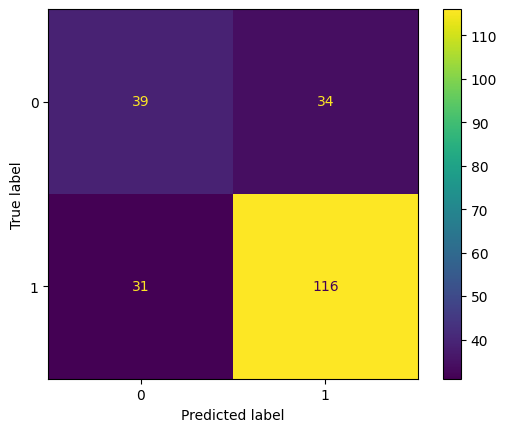


LOGISTIC REGRESSION:
                precision    recall  f1-score   support

           0       0.50      0.75      0.60        73
           1       0.83      0.62      0.71       147

    accuracy                           0.66       220
   macro avg       0.67      0.69      0.65       220
weighted avg       0.72      0.66      0.67       220

training:  0.7215777262180975


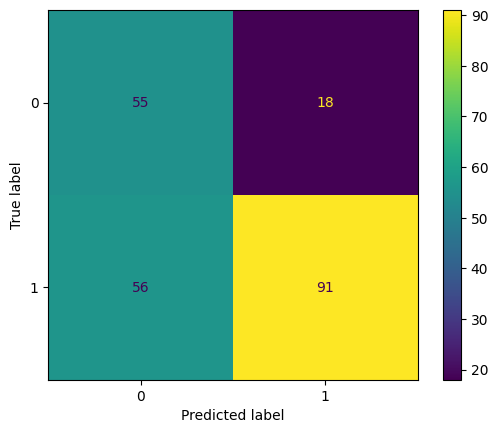

In [23]:
def runLog(X_train, X_test,y_train, y_test): 
    scale= preprocessing.StandardScaler()
    X_train =scale.fit_transform(X_train)
    X_test =scale.fit_transform(X_test)

    log_reg = linear_model.LogisticRegression(max_iter = 300)
    log_reg.fit(X_train, y_train)
    log_reg_pred = log_reg.predict(X_test)
    log_train_pred = log_reg.predict(X_train)
    print ('\nLOGISTIC REGRESSION:\n ', metrics.classification_report(y_test,log_reg_pred))
    print ('training: ', metrics.accuracy_score(y_train,log_train_pred))
    print_cm(log_reg, y_test, log_reg_pred)
    #
runLog(X_train, X_test,y_train, y_test)
runLog(X_train_scaled, X_test,y_train_scaled, y_test)


Logistic Regression does not perform near as well as SVM. The number of false negatives is significantly larger than that of SVM, and that only gets worse after oversampling. This may be due to the lingering highly correlated features, as like Naive Bayes the Logistic Regression classifier assumes each variable is independent. This is the cause of the lower training accuracy.

## KNN

For the K-Nearest Neighbors model below, I tried several neighbor values, ultimately settling on a 3NN model. For the implementation, I used sklearn's [neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) library. Like the other sklearn modules, it is very easy to use:


 KNN (k=3):
                precision    recall  f1-score   support

           0       0.68      0.63      0.65        73
           1       0.82      0.85      0.84       147

    accuracy                           0.78       220
   macro avg       0.75      0.74      0.74       220
weighted avg       0.77      0.78      0.78       220



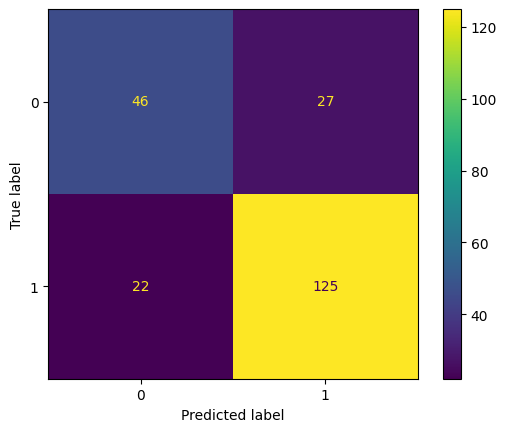


 KNN (k=3):
                precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.97      0.94      0.95       147

    accuracy                           0.94       220
   macro avg       0.92      0.94      0.93       220
weighted avg       0.94      0.94      0.94       220



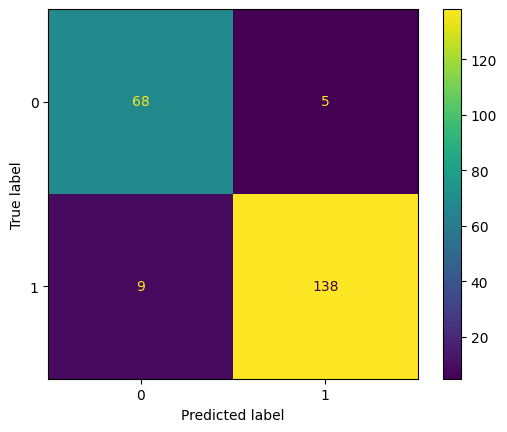

In [29]:
def runKNN(X_train, X_test,y_train, y_test, col):
   
    
    knn=neighbors.KNeighborsClassifier(3)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    print ('\n KNN (k=3):\n ', metrics.classification_report(y_test,knn_pred))
    print_cm(knn, y_test, knn_pred)
    return knn
runKNN(X_train, X_test,y_train, y_test, X_train.columns)
best_model=runKNN(X_train_scaled, X_test,y_train_scaled, y_test, X_train_scaled.columns)

For these KNN models, the normal training data provided fairly undesirable results, with a low accuracy and f1 scores comprable to the Linear Regression model. However, the oversampled model was by far the best classifier of this project, with a 90% accuracy. This could be explained by how oversampling works. The oversampled data is effectively making certain random PD Negative datapoints carry a 2x weight: instead of 1 neighbor, its two. This explains why the KNN model is so accurate at a low neighbor count. The features in the dataset must only differ slightly between Parkinsons patients and healthy subjects, so if there is a healthy subject in the vicinity of a datapoint, it immediately trumps the other neighbors.

## Conclusion
The models above were able to make predictions for Parkinson's disease based on people's voices fairly well, however they are not ready to be used by the general public. When 
The use of oversampling when lacking an adequate amount of data is a very effective technique when used with certain models, especially KNN models. However, it must be used in moderation. Oversampling a high proportion of your data can cause overfitting, as the training data is mostly comprised of the same data. However, if your dataset is not large enough to call for underfitting and you cannot lose any information, overfitting may help.

## Future Work

In future work, I would like to improve the dataset. Learning about how audio data is broken down could give many more features, like that in the first dataset from Istanbul, and locating more healthy voice data could massively improve the training accuracy of each model. With more features, similar to that of the Istanbul dataset, I would also like to perform Principle Component Analysis (PCA) on that data. PCA is a dimensionality reduction tool that removes noise from the data. With the number of features I had to work with for this project, I was unable to utilize it. 